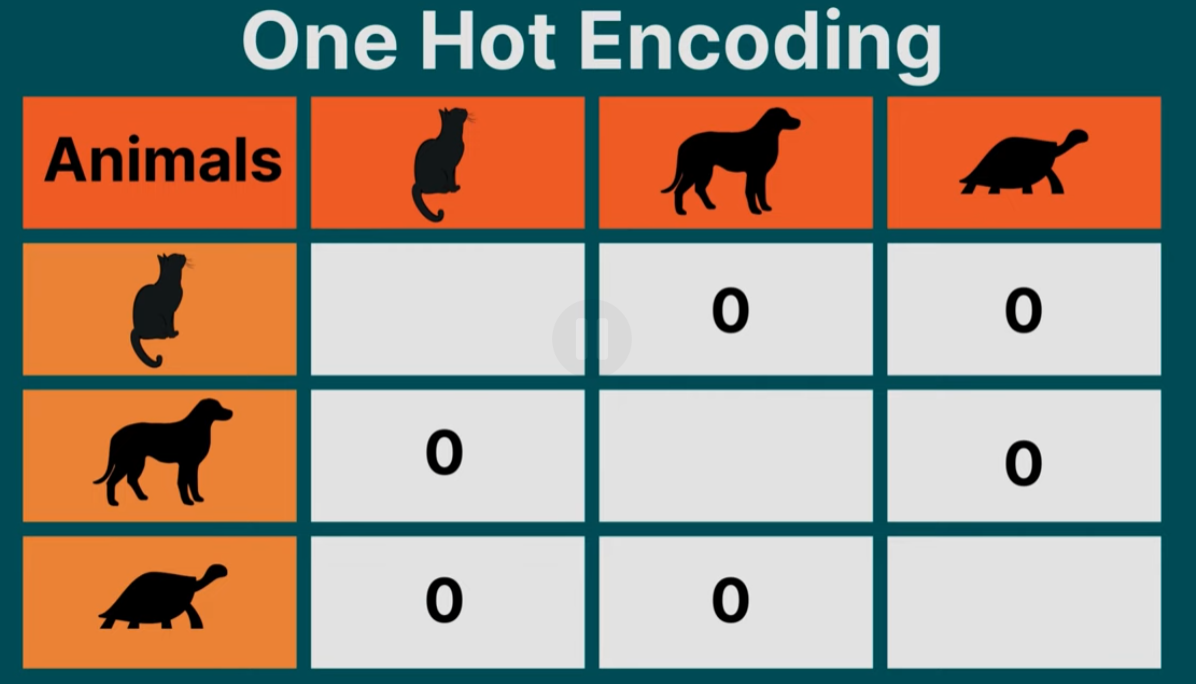

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# One hot encoding - is to represent categorical in a numerical way


status = np.array([
    "No infection",
    "No infection",
    "No infection",
    "No infection",
    "No infection",
    "Viral infection",
    "Viral infection",
    "Viral infection",
    "Viral infection",
    "Viral infection",
    "Bacterial infection",
    "Bacterial infection",
    "Bacterial infection",
    "Bacterial infection",
    "Bacterial infection"
])

crp = np.array([
    3.8,
    5.6,
    7.8,
    9.2,
    14.5,
    12.9,
    34.6,
    30.3,
    47.0,
    58.1,
    54.8,
    74.7,
    82.9,
    92.0,
    98.3
])



In [7]:
infection_status = ["No infection", "Viral infection", "Bacterial infection"]

# Create mapping
category = {}
for  i, type in enumerate(infection_status):
    category[type] = i

# Create one-hot encoded matrix
one_hot = np.zeros((len(status), len(infection_status)), dtype=np.uint8)  # rows x cols

for i, s in enumerate(status):
    j = category[s]
    one_hot[i, j] = 1


data = pd.DataFrame({
    'status': status,
    'crp': crp,
    'no_infection': one_hot[:, 0],
    'viral_infection': one_hot[:, 1],
    'bacterial_infection': one_hot[:, 2]
})

data

,status,crp,no_infection,viral_infection,bacterial_infection
0,No infection,3.8,1,0,0
1,No infection,5.6,1,0,0
2,No infection,7.8,1,0,0
3,No infection,9.2,1,0,0
4,No infection,14.5,1,0,0
5,Viral infection,12.9,0,1,0
6,Viral infection,34.6,0,1,0
7,Viral infection,30.3,0,1,0
8,Viral infection,47.0,0,1,0
9,Viral infection,58.1,0,1,0


Iteration= 0 | w= 0.0000 , b= 0.0000
Iteration= 1000 | w= -6.7861 , b= -5.1189
Iteration= 2000 | w= -8.2119 , b= -6.4371
Iteration= 3000 | w= -9.1275 , b= -7.2895
Iteration= 4000 | w= -9.8119 , b= -7.9268
Iteration= 5000 | w= -10.3582 , b= -8.4350
Iteration= 6000 | w= -10.8107 , b= -8.8553
Iteration= 7000 | w= -11.1940 , b= -9.2108
Iteration= 8000 | w= -11.5239 , b= -9.5163
Iteration= 9000 | w= -11.8111 , b= -9.7819
Iteration= 10000 | w= -12.0632 , b= -10.0147
Iteration= 11000 | w= -12.2860 , b= -10.2203
Iteration= 12000 | w= -12.4840 , b= -10.4028
Iteration= 13000 | w= -12.6607 , b= -10.5655
Iteration= 14000 | w= -12.8190 , b= -10.7111
Iteration= 15000 | w= -12.9612 , b= -10.8418
Iteration= 16000 | w= -13.0893 , b= -10.9595
Iteration= 17000 | w= -13.2049 , b= -11.0657
Iteration= 18000 | w= -13.3095 , b= -11.1617
Iteration= 19000 | w= -13.4044 , b= -11.2487
Iteration= 20000 | w= -13.4904 , b= -11.3276
Iteration= 21000 | w= -13.5686 , b= -11.3993
Iteration= 22000 | w= -13.6397 , b= -11.

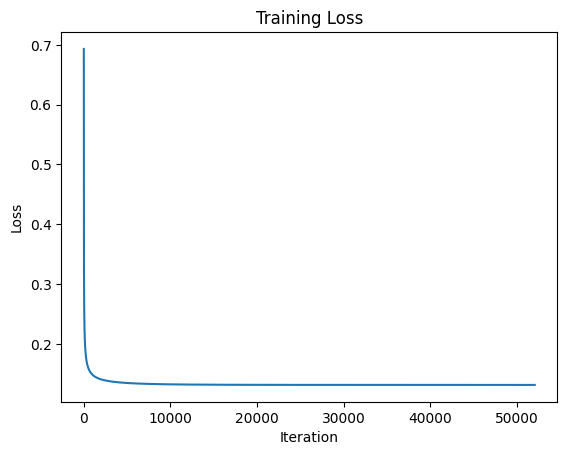

In [26]:
x_train = np.array(data["crp"])
y_train = np.array(data["no_infection"], dtype=np.uint8)

x_norm = (x_train - np.mean(x_train)) / np.std(x_train)

w1 = 0
b1 = 0
LEARNING_RATE = 0.5
CONVERGE_LIMIT = 0.00001
ITERATION = 100000

def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

def loss(predict, actual):
    if (len(predict) == len(actual)):
        m = len(predict)
        # Add small epsilon to avoid log(0)
        epsilon = 1e-15
        predict = np.clip(predict, epsilon, 1 - epsilon)
        total_diff = actual * np.log(predict) + (1 - actual) * np.log(1 - predict)
        return - (np.sum(total_diff) / m)
    else:
        print("the prediction and actual data length is not the same")

def gradient_w(predict, actual, feature):
    if (len(predict) == len(actual) == len(feature)):
        M = len(predict)
        return np.sum((predict - actual) * feature) / M  # Fixed: use parameters
    else:
        print("the prediction and actual data length is not the same")

def gradient_b(predict, actual):
    if (len(predict) == len(actual)):
        M = len(predict)
        return np.sum(predict - actual) / M  # Fixed: use parameters
    else:
        print("the prediction and actual data length is not the same")

cost = []
for i in range(ITERATION):
    if i % 1000 == 0:  # Print less frequently
        print(f"Iteration= {i} | w= {w1:.4f} , b= {b1:.4f}")
    
    y_predict = model(w1, b1, x_norm)
    cost.append(loss(y_predict, y_train))  # Fixed: use y_train

    g_w = gradient_w(y_predict, y_train, x_norm)
    g_b = gradient_b(y_predict, y_train)

    w1 = w1 - LEARNING_RATE * g_w
    b1 = b1 - LEARNING_RATE * g_b
    
    if (abs(g_w) <= CONVERGE_LIMIT and abs(g_b) <= CONVERGE_LIMIT):
        print(f"Converged at iteration {i}")
        break


print(f"Normalized weights: w={w1:.4f}, b={b1:.4f}")

w_original = w1 / np.std(x_train)
b_original = b1 - (w1 * np.mean(x_train) / np.std(x_train))
print(f"Original scale weights: w={w_original}, b={b_original}")

# Plot
iteration = range(len(cost))
plt.plot(iteration, cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Iteration= 0 | w= 0.0000 , b= 0.0000
Converged at iteration 41
Normalized weights: w=-0.2467, b=-0.7036
Original scale weights: w=-0.007629492731427622, b=-0.3848919918283133


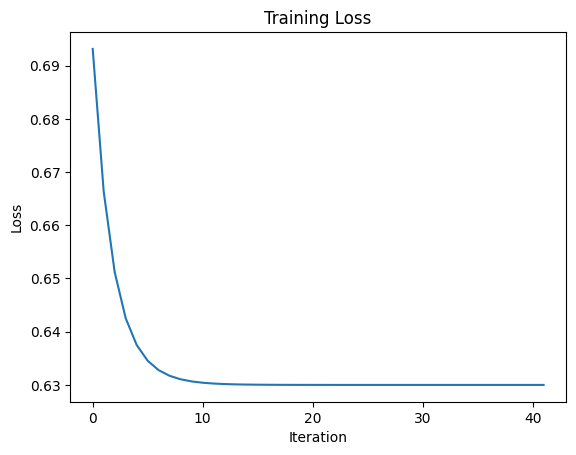

In [34]:
x_train = np.array(data["crp"])
y_train = np.array(data["viral_infection"], dtype=np.uint8)

x_norm = (x_train - np.mean(x_train)) / np.std(x_train)

w2 = 0
b2 = 0
LEARNING_RATE = 1
CONVERGE_LIMIT = 0.00001
ITERATION = 100000

def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

def loss(predict, actual):
    if (len(predict) == len(actual)):
        m = len(predict)
        # Add small epsilon to avoid log(0)
        epsilon = 1e-15
        predict = np.clip(predict, epsilon, 1 - epsilon)
        total_diff = actual * np.log(predict) + (1 - actual) * np.log(1 - predict)
        return - (np.sum(total_diff) / m)
    else:
        print("the prediction and actual data length is not the same")

def gradient_w(predict, actual, feature):
    if (len(predict) == len(actual) == len(feature)):
        M = len(predict)
        return np.sum((predict - actual) * feature) / M  # Fixed: use parameters
    else:
        print("the prediction and actual data length is not the same")

def gradient_b(predict, actual):
    if (len(predict) == len(actual)):
        M = len(predict)
        return np.sum(predict - actual) / M  # Fixed: use parameters
    else:
        print("the prediction and actual data length is not the same")

cost = []
for i in range(ITERATION):
    if i % 100 == 0:  # Print less frequently
        print(f"Iteration= {i} | w= {w2:.4f} , b= {b2:.4f}")
    
    y_predict = model(w2, b2, x_norm)
    cost.append(loss(y_predict, y_train))  # Fixed: use y_train

    g_w = gradient_w(y_predict, y_train, x_norm)
    g_b = gradient_b(y_predict, y_train)

    w2 = w2 - LEARNING_RATE * g_w
    b2 = b2 - LEARNING_RATE * g_b
    
    if (abs(g_w) <= CONVERGE_LIMIT and abs(g_b) <= CONVERGE_LIMIT):
        print(f"Converged at iteration {i}")
        break


print(f"Normalized weights: w={w2:.4f}, b={b2:.4f}")

w_original = w2 / np.std(x_train)
b_original = b2 - (w2 * np.mean(x_train) / np.std(x_train))
print(f"Original scale weights: w={w_original}, b={b_original}")

# Plot
iteration = range(len(cost))
plt.plot(iteration, cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Iteration= 0 | w= 0.0000 , b= 0.0000
Iteration= 100 | w= 1.7717 , b= -0.7693
Iteration= 200 | w= 2.3915 , b= -1.0830
Iteration= 300 | w= 2.7778 , b= -1.2907
Iteration= 400 | w= 3.0630 , b= -1.4462
Iteration= 500 | w= 3.2911 , b= -1.5702
Iteration= 600 | w= 3.4818 , b= -1.6729
Iteration= 700 | w= 3.6462 , b= -1.7605
Iteration= 800 | w= 3.7907 , b= -1.8366
Iteration= 900 | w= 3.9197 , b= -1.9039
Iteration= 1000 | w= 4.0363 , b= -1.9640
Iteration= 1100 | w= 4.1425 , b= -2.0184
Iteration= 1200 | w= 4.2400 , b= -2.0678
Iteration= 1300 | w= 4.3301 , b= -2.1132
Iteration= 1400 | w= 4.4139 , b= -2.1551
Iteration= 1500 | w= 4.4920 , b= -2.1939
Iteration= 1600 | w= 4.5652 , b= -2.2301
Iteration= 1700 | w= 4.6340 , b= -2.2639
Iteration= 1800 | w= 4.6989 , b= -2.2956
Iteration= 1900 | w= 4.7602 , b= -2.3255
Iteration= 2000 | w= 4.8183 , b= -2.3537
Iteration= 2100 | w= 4.8735 , b= -2.3803
Iteration= 2200 | w= 4.9261 , b= -2.4056
Iteration= 2300 | w= 4.9761 , b= -2.4296
Iteration= 2400 | w= 5.0239 ,

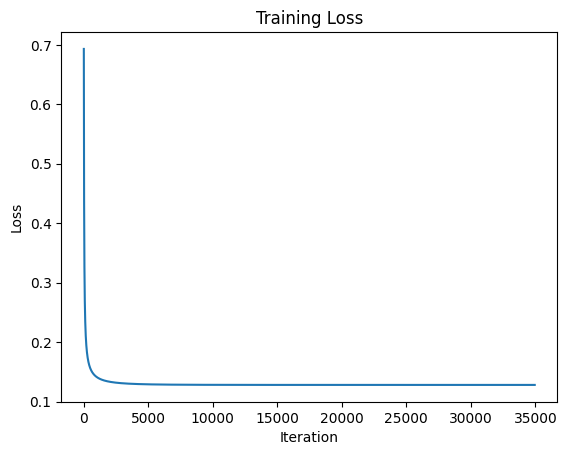

In [36]:
x_train = np.array(data["crp"])
y_train = np.array(data["bacterial_infection"], dtype=np.uint8)

x_norm = (x_train - np.mean(x_train)) / np.std(x_train)

w3 = 0
b3 = 0
LEARNING_RATE = 0.1
CONVERGE_LIMIT = 0.00001
ITERATION = 100000

def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

def loss(predict, actual):
    if (len(predict) == len(actual)):
        m = len(predict)
        # Add small epsilon to avoid log(0)
        epsilon = 1e-15
        predict = np.clip(predict, epsilon, 1 - epsilon)
        total_diff = actual * np.log(predict) + (1 - actual) * np.log(1 - predict)
        return - (np.sum(total_diff) / m)
    else:
        print("the prediction and actual data length is not the same")

def gradient_w(predict, actual, feature):
    if (len(predict) == len(actual) == len(feature)):
        M = len(predict)
        return np.sum((predict - actual) * feature) / M  # Fixed: use parameters
    else:
        print("the prediction and actual data length is not the same")

def gradient_b(predict, actual):
    if (len(predict) == len(actual)):
        M = len(predict)
        return np.sum(predict - actual) / M  # Fixed: use parameters
    else:
        print("the prediction and actual data length is not the same")

cost = []
for i in range(ITERATION):
    if i % 100 == 0:  # Print less frequently
        print(f"Iteration= {i} | w= {w3:.4f} , b= {b3:.4f}")
    
    y_predict = model(w3, b3, x_norm)
    cost.append(loss(y_predict, y_train))  # Fixed: use y_train

    g_w = gradient_w(y_predict, y_train, x_norm)
    g_b = gradient_b(y_predict, y_train)

    w3 = w3 - LEARNING_RATE * g_w
    b3 = b3 - LEARNING_RATE * g_b
    
    if (abs(g_w) <= CONVERGE_LIMIT and abs(g_b) <= CONVERGE_LIMIT):
        print(f"Converged at iteration {i}")
        break


print(f"Normalized weights: w={w3:.4f}, b={b3:.4f}")

w_original = w3 / np.std(x_train)
b_original = b3 - (w3 * np.mean(x_train) / np.std(x_train))
print(f"Original scale weights: w={w_original}, b={b_original}")

# Plot
iteration = range(len(cost))
plt.plot(iteration, cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Text(70, 1, '-0.4438x + 6.4213')

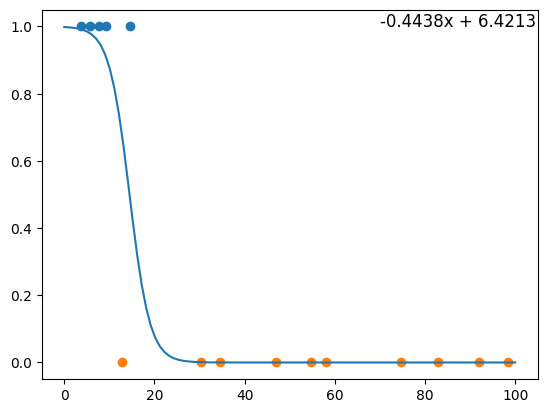

In [63]:
plot1 = data[data["no_infection"] == 1]
plot2 = data[data["no_infection"] == 0]

m = -0.443757
c = 6.421320

def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

x_smooth = np.linspace(0,100,100)
plt.scatter(plot1["crp"], plot1["no_infection"])
plt.scatter(plot2["crp"], plot2["no_infection"])
plt.plot(x_smooth, model(m,c,x_smooth))
plt.text(70, 1, f"{m:.4f}x + {c:.4f}", fontsize=12)

Text(70, 1, '-0.0076x + -0.3849')

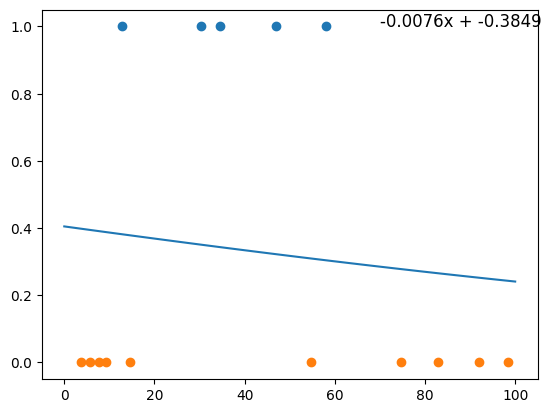

In [64]:
plot1 = data[data["viral_infection"] == 1]
plot2 = data[data["viral_infection"] == 0]

m=-0.00762949
c=-0.38489199

def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

x_smooth = np.linspace(0,100,100)
plt.scatter(plot1["crp"], plot1["viral_infection"])
plt.scatter(plot2["crp"], plot2["viral_infection"])
plt.plot(x_smooth, model(m,c,x_smooth))
plt.text(70, 1, f"{m:.4f}x + {c:.4f}", fontsize=12)

Text(20, 1, '0.2080x + -11.9196')

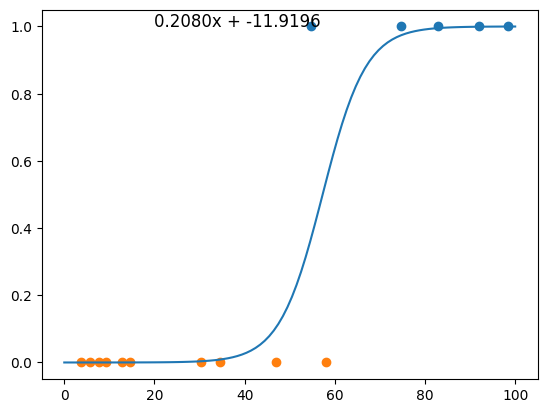

In [68]:
plot1 = data[data["bacterial_infection"] == 1]
plot2 = data[data["bacterial_infection"] == 0]

m=0.208014 
c=-11.9196

def model(w, b, x):
    z = w * x + b
    return 1 / (1 + np.exp(-z)) 

x_smooth = np.linspace(0,100,100)
plt.scatter(plot1["crp"], plot1["bacterial_infection"])
plt.scatter(plot2["crp"], plot2["bacterial_infection"])
plt.plot(x_smooth, model(m,c,x_smooth))
plt.text(20, 1, f"{m:.4f}x + {c:.4f}", fontsize=12)

In [78]:
w1 = -0.443757
b1 = 6.421320

w2=-0.00762949
b2=-0.38489199

w3=0.208014 
b3=-11.9196

x =25

def z(w, b, x):
    return w * x + b
    
sum = np.exp(z(w1,b1,x)) + np.exp(z(w2,b2,x)) + np.exp(z(w3,b3,x))

print (np.exp(z(w1,b1,x))/ sum)
print (np.exp(z(w2,b2,x))/ sum)
print (np.exp(z(w3,b3,x))/ sum)

0.016316608175253763
0.9815758157749884
0.0021075760497578084
